[Reference](https://medium.com/intuition/statistics-multivariate-time-series-analysis-vma-var-varma-3cb1fbac5553)

In [1]:
from copy import deepcopy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acovf, acf
import statsmodels.api as sm

# VMA(1) process

In [2]:
# VMA(1) process simulated data

sample_num = 100

mean = np.array([0, 0])
cov = np.array([[1, 0], [0, 1]])

error_vec = np.random.multivariate_normal(mean, cov, sample_num).T
print(error_vec.shape)

# sample coefficients of VMA(1) process
B1 = np.array([[0.5, 0.0], [0.0, 0.5]])
B2 = np.array([[0.5, 0.5], [0.0, 0.5]])
B3 = np.array([[0.5, 0.0], [0.5, 0.5]])
B4 = np.array([[0.5, 0.5], [0.5, 0.5]])

(2, 100)


In [3]:
def generate_VMA(error_vec: np.array, B: np.array) -> np.array:
    """
    Generate the VMA process
    """
    res = np.zeros((sample_num, 2))

    for j in range(1, sample_num):
        e_current = error_vec[:, j].reshape(2, 1)
        e_previous = error_vec[:, j-1].reshape(2, 1)
        res[j] = calculate_VMA(e_current, e_previous, B).T

    return res

def calculate_VMA(e_current: np.array, e_previous: np.array, B: np.array) -> np.array:
    """
    Calculate VMA(1) process value
    args:
        e_current [np.array] : the error term at the current step
        e_previous [np.array] : the error term at the previous step
        B [np.array] : the coefficient matrix of the VMA(1) process
    return:
        y_current [np.array] : the calculation result of the VMA(1) process
    """

    y_current = e_current + np.dot(B, e_previous).reshape(2, 1)

    return y_current

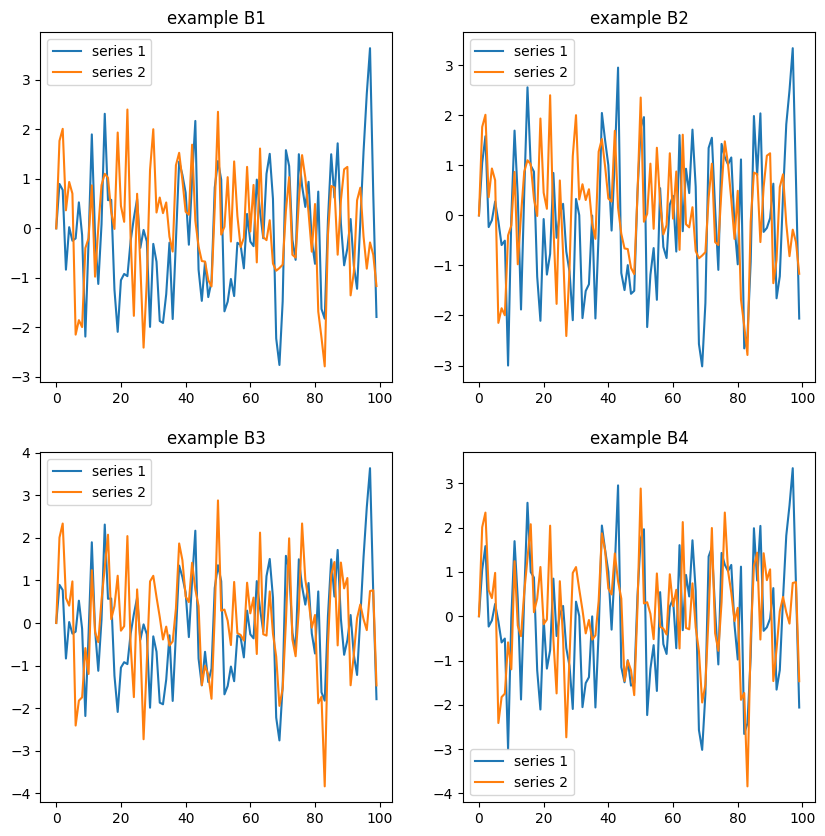

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i, B in enumerate([B1, B2, B3, B4]):
    x = i // 2
    y = i % 2

    res = generate_VMA(error_vec, B)

    ax[x, y].plot(res, label=['series 1', 'series 2'])
    ax[x, y].set_title(f'example B{str(i+1)}')
    ax[x, y].legend()

plt.legend()
plt.show()

# VAR(1)

In [5]:
# VAR(1) process simulated data

sample_num = 100

mean = np.array([0, 0])
cov = np.array([[1, 0], [0, 1]])

error_vec = np.random.multivariate_normal(mean, cov, sample_num).T
print(error_vec.shape)

# sample coefficients of VAR(1) process
B1 = np.array([[0.5, 0.0], [0.0, 0.5]])
B2 = np.array([[0.5, 0.5], [0.0, 0.5]])
B3 = np.array([[0.5, 0.0], [0.5, 0.5]])
B4 = np.array([[0.5, 0.5], [0.5, 0.5]])

(2, 100)


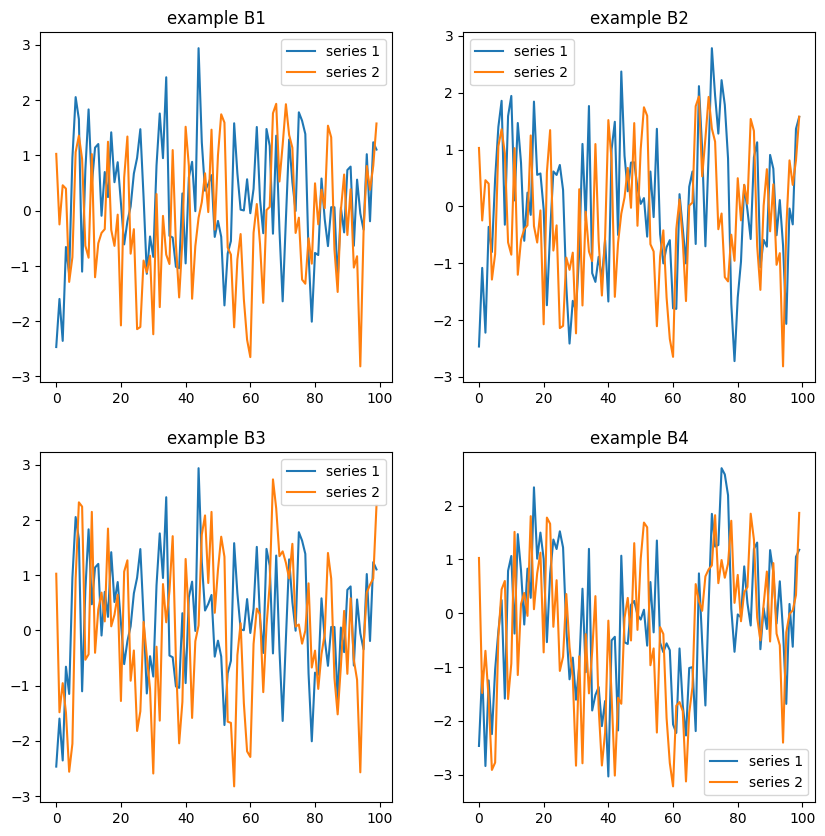

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i, B in enumerate([B1, B2, B3, B4]):
    x = i // 2
    y = i % 2

    res = np.zeros((sample_num, 2))
    previous_z = np.array([0, 0]).reshape(2, 1)

    for j in range(sample_num):
        a_t = error_vec[:, j].reshape(2, 1)
        res[j] = (np.dot(B, previous_z) + a_t).T
        previous_z = res[j].reshape(2, 1)

    ax[x, y].plot(res, label=['series 1', 'series 2'])
    ax[x, y].set_title(f'example B{str(i+1)}')
    ax[x, y].legend()

plt.legend()
plt.show()

In [7]:
# sample coefficients of VAR(1) process
B1 = np.array([[0.5, 0.0], [0.0, 0.5]])
B2 = np.array([[0.5, 0.5], [0.0, 0.5]])
B3 = np.array([[0.5, 0.0], [0.5, 0.5]])
B4 = np.array([[0.5, 0.5], [0.5, 0.5]])

B_names = ["B1", "B2", "B3", "B4"]

# calculate the eigenvalue
for i, B in enumerate([B1, B2, B3, B4]):
    X = np.eye(2) - B
    w, v = np.linalg.eig(X)


    print(B_names[i], w)

B1 [0.5 0.5]
B2 [0.5 0.5]
B3 [0.5 0.5]
B4 [1.00000000e+00 1.11022302e-16]


In [8]:
# sample coefficients of VAR(1) process
B1 = np.array([[1.9, 1.3], [0.1, 0.8]])
B2 = np.array([[0.1, 0.0], [0.0, 0.1]])

# calculate the eigenvalue
for i, B in enumerate([B1, B2]):
    X = np.eye(2) - B
    w, v = np.linalg.eig(X)

    print(w)

[-1.00764732  0.30764732]
[0.9 0.9]


# Application

In [9]:
df = pd.read_csv('https://gist.githubusercontent.com/tanukon/fe2b0daf0080e4312490edbf38538b65/raw/29d39f82628d003f28f2ec619021c5482df0a060/US_monthly_retail_dataset.csv')
df.head()

,Period,AUT,BUM,GEM,GRO,COM
0,June 09,48078,26350,47089,42146,19822
1,July 09,51093,24003,47097,43838,20704
2,August 09,55677,21522,48826,42994,21609
3,September 09,42299,21304,44202,41537,20050
4,October 09,45268,21263,48509,43020,21425


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Period  90 non-null     object
 1   AUT     90 non-null     int64 
 2   BUM     90 non-null     int64 
 3   GEM     90 non-null     int64 
 4   GRO     90 non-null     int64 
 5   COM     90 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.3+ KB


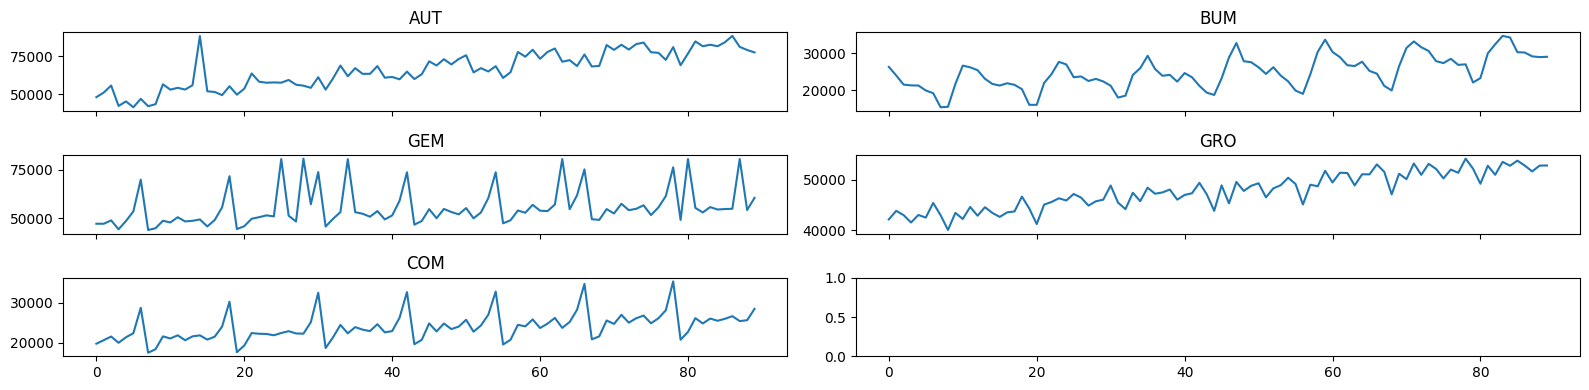

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(16, 4), sharex=True)

columns = df.columns.tolist()[1:]

for i, col in enumerate(columns):
    x = i // 2
    y = i % 2

    ax[x, y].plot(df[col])
    ax[x, y].set_title(col)


plt.tight_layout()
plt.show()

In [12]:
diff_df = df[['AUT', 'BUM', 'GEM', 'GRO', 'COM']].diff()
diff_df = diff_df.dropna()
diff_df.head()

,AUT,BUM,GEM,GRO,COM
1,3015.0,-2347.0,8.0,1692.0,882.0
2,4584.0,-2481.0,1729.0,-844.0,905.0
3,-13378.0,-218.0,-4624.0,-1457.0,-1559.0
4,2969.0,-41.0,4307.0,1483.0,1375.0
5,-3820.0,-1348.0,4980.0,-512.0,1014.0


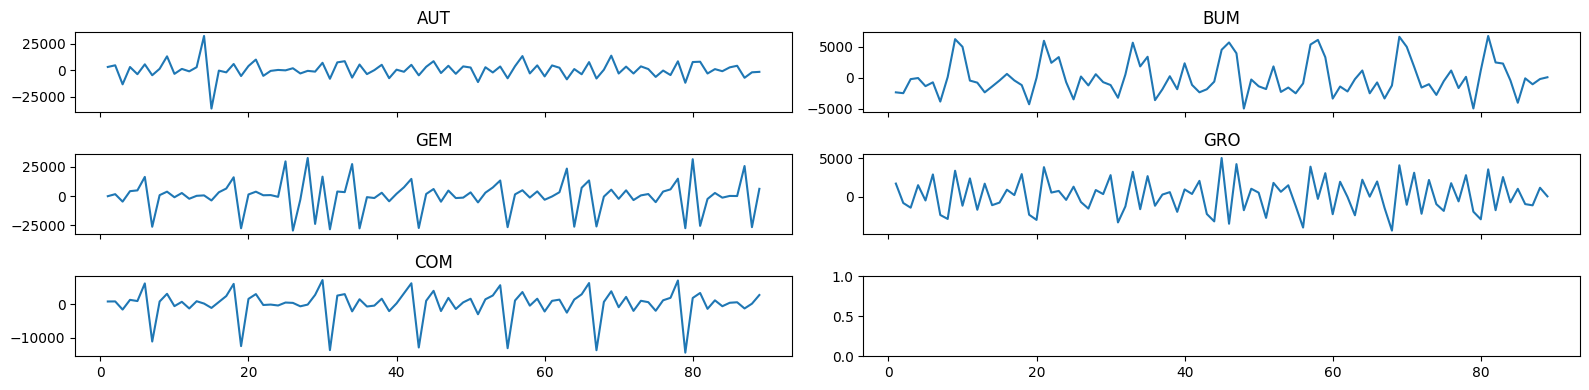

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(16, 4), sharex=True)

columns = diff_df.columns.tolist()

for i, col in enumerate(columns):
    x = i // 2
    y = i % 2

    ax[x, y].plot(diff_df[col])
    ax[x, y].set_title(col)


plt.tight_layout()
plt.show()

# VAR modeling

In [14]:
var = sm.tsa.VAR(diff_df)
result = var.fit(maxlags=5, ic='aic')
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 28, Aug, 2024
Time:                     22:44:18
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    81.2990
Nobs:                     84.0000    HQIC:                   79.0493
Log likelihood:          -3722.51    FPE:                5.24177e+33
AIC:                      77.5370    Det(Omega_mle):     1.36116e+33
--------------------------------------------------------------------
Results for equation AUT
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const       2332.699534       774.171432            3.013           0.003
L1.AUT        -0.653030         0.131165           -4.979           0.000
L1.BUM        -0.002831         0.535472           -0.005           0.996
L1.GEM        -0

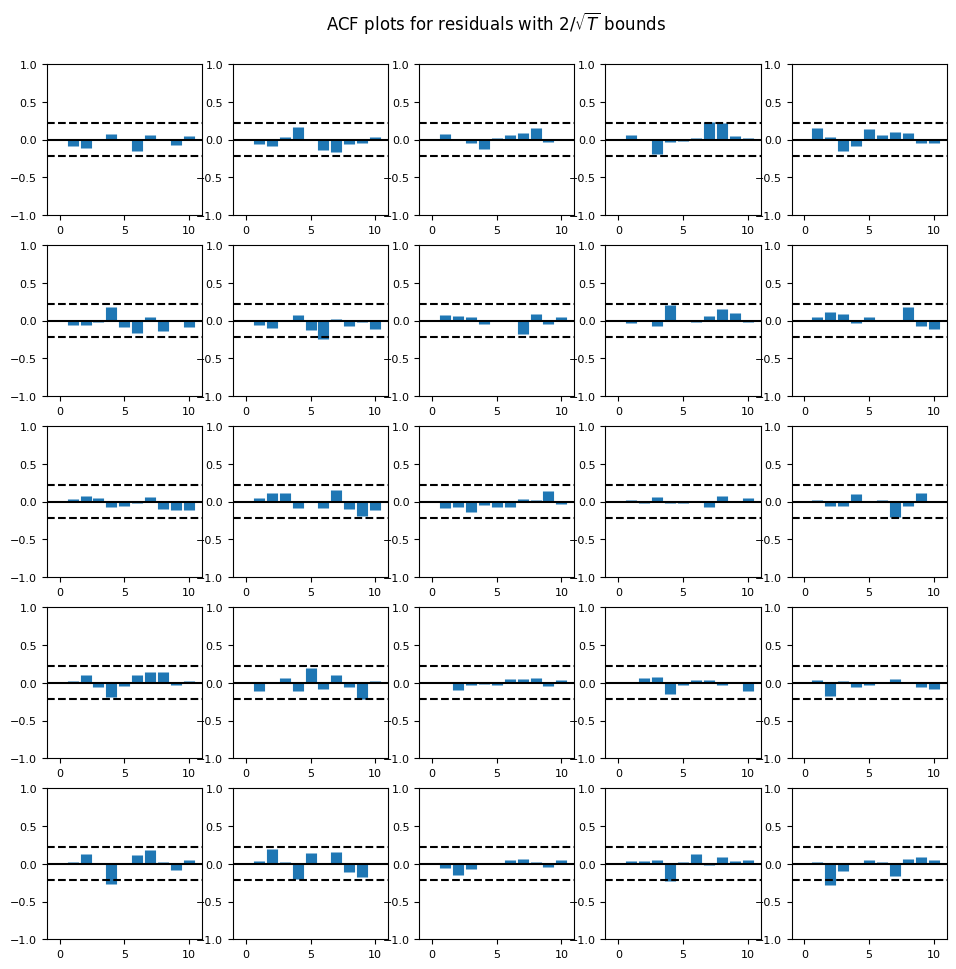

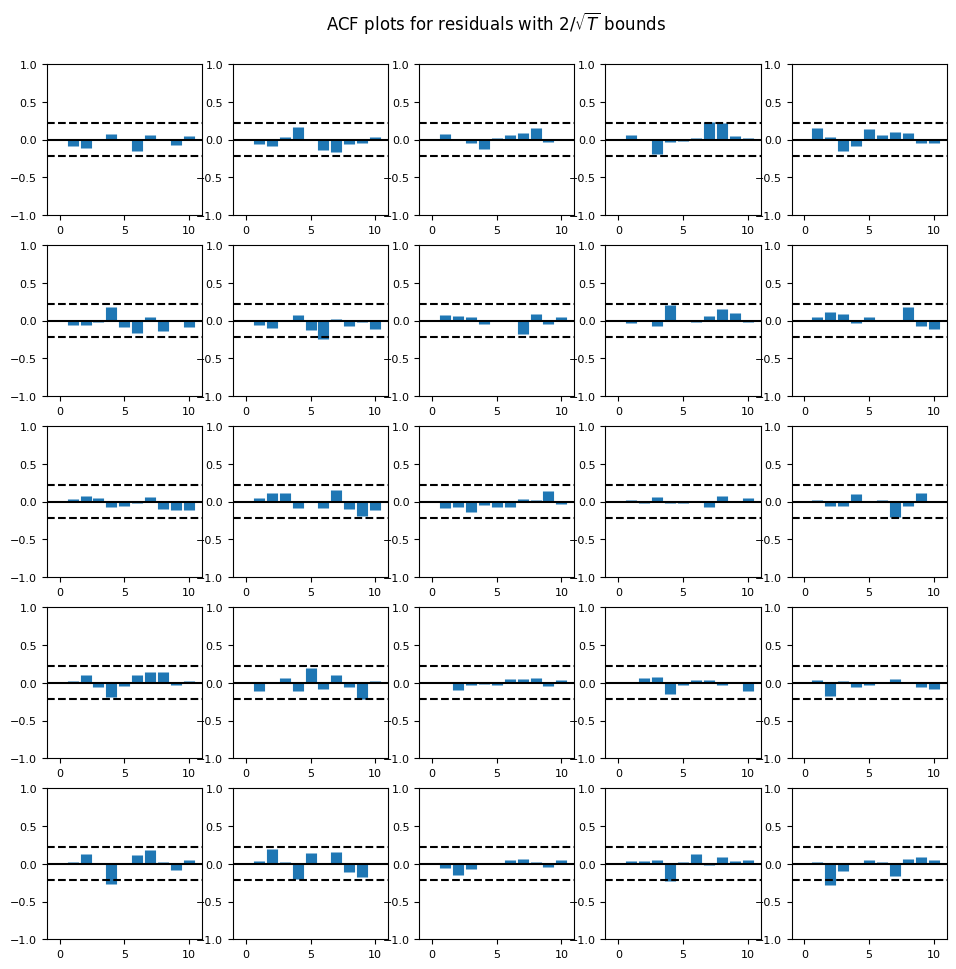

In [15]:
result.plot_acorr()

# VARMA modeling

In [16]:
# modeling
results = []

for p in range(1, 5):
    for q in range(1, 5):
        model = sm.tsa.VARMAX(diff_df, order=(p, q))
        result = model.fit(maxiter=1000, disp=False)

        results.append([p, q, result.aic])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-package

In [17]:
res_df = pd.DataFrame(results, columns=['p', 'q', 'AIC'])
res_df.sort_values(by=['AIC']).head()

,p,q,AIC
12,4,1,8267.592264
13,4,2,8292.739782
14,4,3,8331.100651
15,4,4,8357.682312
8,3,1,8360.735346
